<a href="https://colab.research.google.com/github/srkpriyanka95/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Regression analysis in machine learning gives us the relationship between the dependent and the independent variables. Regression analysis provides information such as how the dependent variable changes with the change in the independent variables. 


Regression analysis is a predictive analysis in machine learning, where the algorithms try to understand the relationship between the dependent and independent variables to predict unseen data. The regression model tries to pick the best fit line through the given dependent variables to predict the outcome. The assumptions in the regression analysis are

>>>* The relationship between the independent and dependent variables is linear.
* There is no multicollinearity between the independent variables.
* The errors should follow a normal distribution.
* There should be homoscedasticity of errors or residuals. The variance should be almost the same at every point of the line.

In this project, we are doing a regression analysis of the Seoul bike rental data to predict the count of bikes rented with the help of the dependent variables in the dataset. The data set contains pieces of information such as the rented bike count, hour, season, temperature, humidity, holiday, functioning day, etc., 

The dependent or the target variable for the regression analysis is the rented bike count. We are trying to train our model to learn the patterns inside the data and to predict the outcome accordingly.

The different steps involved in this Regression project are 
>>>* Exploratory Data Analysis
* Feature selection and data preprocessing
* Scaling of variables
* Model implementation
* Linear Regression
* Lasso Regression
* Ridge Regression
* ElasticNet Regression
* Cross Validation and hyperparameters

---



**Exploratory Data Analysis -**
 	In EDA, we will deal with the missing and duplicates in the dataset. We look deeper into the variables and their relationships with each other.

   ---

**Feature Selection and Data preprocessing-**
	Data preprocessing is to look into multicollinearity between the independent variables and drop the unimportant feature. We split the variables using train_test_split to see how the model performs and predict errors for the unseen data. 

---
**Feature Scaling -**
	Feature Scaling is a technique to bring the values into a particular range. Feature scaling helps the gradient descent reach the cost function minima easier than with the unscaled values. There are two types of scalings are
>>>* Normalization - Uses min and max values
   >* Standardization - Uses mean and standard deviation
---
**Model implementation -** In this project, we will implement Linear Regression, lasso regression, Ridge regression, and elastic net Regression. By looking into their model errors, we try to conclude.
	
---
**Cross Validation and hyperparameters**
	In the train test split, train and test data is split on a ratio and pushed into the model, where there is a possibility for inaccurate prediction. So we use cross-validation, where the data is divided into different subsets and tested multiple times.

# **GitHub Link -**



https://github.com/srkpriyanka95/Bike-Sharing-Demand-Prediction-.git



# **Problem Statement**


Nowadays, rental bikes are introduced in many urban cities to enhance mobility comfort and for an easier commute. Availability and accessibility of bikes should be easier for the public, and the waiting time should be less. The crucial part is to analyze the demand and provide the bikes as per the need. To make the process smooth and hassle-free, we should predict the bike demands for different hours of the day. By implementing machine-learning models to the Seoul bike rental data set, we try to predict the bike demands at various hours of the day.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import *
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load Dataset
BikeShare_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Bike sharing demand prediction/SeoulBikeData.csv',encoding='unicode escape')

### Dataset First View

In [7]:
# Dataset First Look
BikeShare_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
BikeShare_data.shape

(8760, 14)

### Dataset Information

In [9]:
# Dataset Info
BikeShare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
BikeShare_data.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
BikeShare_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

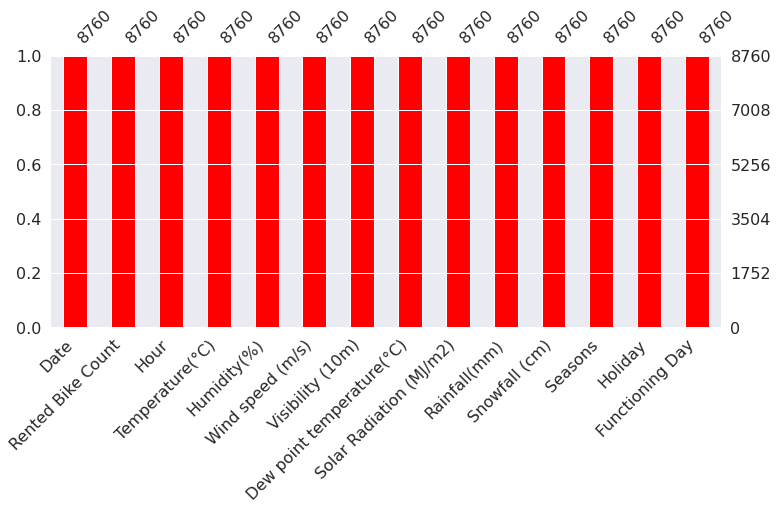

In [12]:
# Visualizing the missing values
msno.bar(BikeShare_data,figsize=(12,5),color='Red')

### What did you know about your dataset?

*   There are 8760 observations and 14 features in the dataset

*   There are no duplicates found.
*   There are no missing values in the dataset.
*   The dataset contains three different datatypes, namely 
      



>>>>>
*   object 
*   int 
*    float
















## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Renamming columns
BikeShare_data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity', 'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Functioning Day':'functioning_day'},inplace=True)
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'Seasons', 'Holiday', 'functioning_day'],
      dtype='object')

In [15]:
# Dataset Describe
BikeShare_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description 



*   **Date** - Date
*   **Rented Bike Count** - Number of Bikes Rented
*   **Hour** - Hour of the day
*  **Temperature(°C)** - Temperature of the day
* **Humidity(%)** - Humidity percentage
* **Wind speed (m/s)** - wind speed 
* **Visibility (10m)** - Visibility measure for 10 m
* **Dew point temperature(°C)** - Dew point temperature
* **Solar Radiation (MJ/m2)** - Solar radiation fot the day
* **Rainfall(mm)** - Rainfall in mm
* **Snowfall (cm)** - Snowfall in cm
* **Seasons** - Season of the year
* **Holiday** - Is it a holiday or not
* **Functioning Day** - Is it a functioning day or not







### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

for i in BikeShare_data.columns:
    print('\n The number of unique values in' , i ,' : ', BikeShare_data[i].nunique())



 The number of unique values in Date  :  365

 The number of unique values in Rented Bike Count  :  2166

 The number of unique values in Hour  :  24

 The number of unique values in Temperature  :  546

 The number of unique values in Humidity  :  90

 The number of unique values in wind_speed  :  65

 The number of unique values in visibility  :  1789

 The number of unique values in dew_point_temperature  :  556

 The number of unique values in solar_radiation  :  345

 The number of unique values in rainfall  :  61

 The number of unique values in snowfall  :  51

 The number of unique values in Seasons  :  4

 The number of unique values in Holiday  :  2

 The number of unique values in functioning_day  :  2


In [17]:
# unique values in categorical variables

categorical_variables = list(set(BikeShare_data.columns)-set(BikeShare_data.describe().columns))
print(f'Categorical Variables are {categorical_variables}')
for i in categorical_variables:
  print(f'\n Unique values in {i} are {BikeShare_data[i].unique()}' )


Categorical Variables are ['Seasons', 'Holiday', 'Date', 'functioning_day']

 Unique values in Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']

 Unique values in Holiday are ['No Holiday' 'Holiday']

 Unique values in Date are ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Converting the date column into date time datatype
BikeShare_data['Date']=pd.to_datetime(BikeShare_data['Date'],format='%d/%m/%Y')
# Seperating the month, year and day column for futher analysis
BikeShare_data['month']=BikeShare_data['Date'].dt.month
BikeShare_data['year']=BikeShare_data['Date'].dt.year
BikeShare_data['day']=BikeShare_data['Date'].dt.day_name()
# Creating Weekend column using day name column
BikeShare_data['weekend']=BikeShare_data['day'].apply(lambda  x: 'yes' if (x== 'Saturday' or x== 'Sunday') else 'no')

In [19]:
BikeShare_data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day,month,year,day,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no


In [76]:
# Converting the Date, Month and Year columns into object datatype, as they are categorical variables
BikeShare_data['month']=BikeShare_data['month'].astype('object')
BikeShare_data['year']=BikeShare_data['year'].astype('object')
BikeShare_data['Hour']=BikeShare_data['Hour'].astype('object')
# Checking whether the datatypes are changed are not
BikeShare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   object        
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  fun

In [21]:
# Knowing the start and end date of data
print(f"Data starts from {BikeShare_data.Date.min().strftime('%d-%m-%Y')} to {BikeShare_data.Date.max().strftime('%d-%m-%Y')}")

Data starts from 01-12-2017 to 30-11-2018


### What all manipulations have you done and insights you found?


*   The data set does not have any null or duplicate values.
*   The date column was initially an object data type column. For further analysis, I converted it into a DateTime data type column.
* From the date column, I created columns such as day, month, and year for further analysis.
* From the day column, I created a separate column for the weekend. If weekend 'Yes' else 'No'.
* As all these columns are categorical, the data types of the columns day, month, and year are changed to object data type. 



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1  Univariate analysis of categorical Varibles**

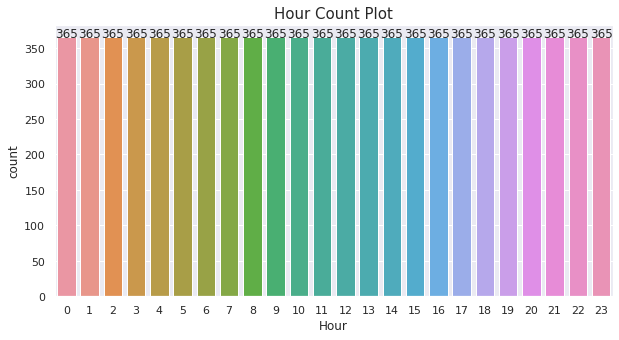

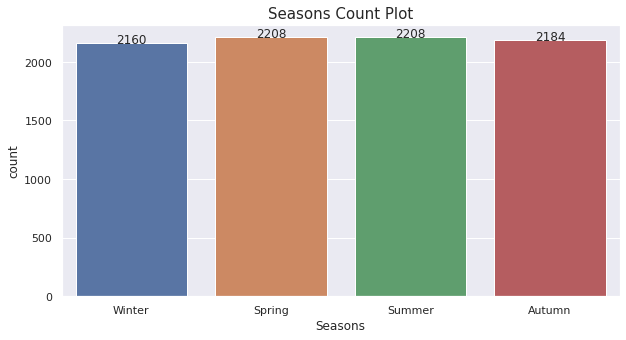

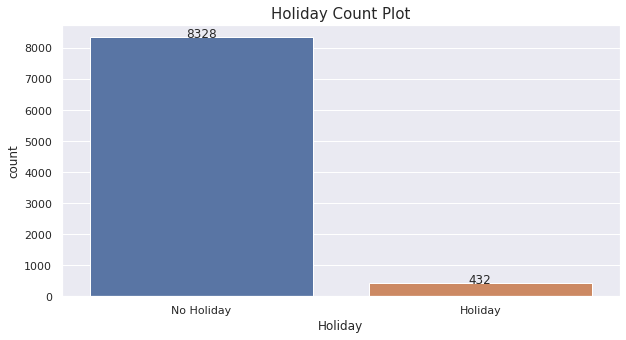

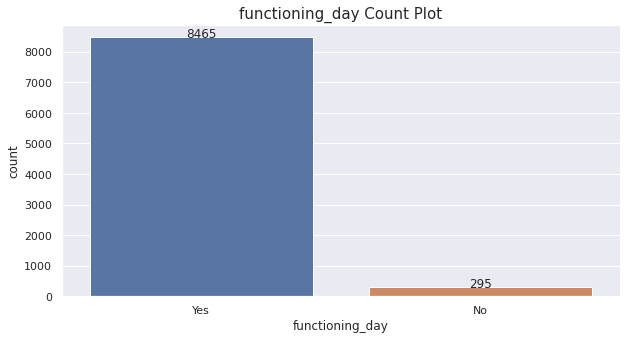

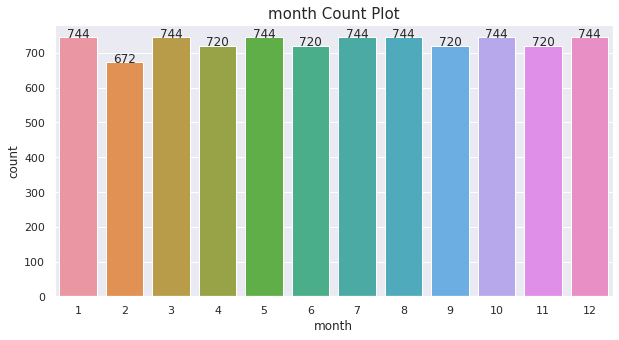

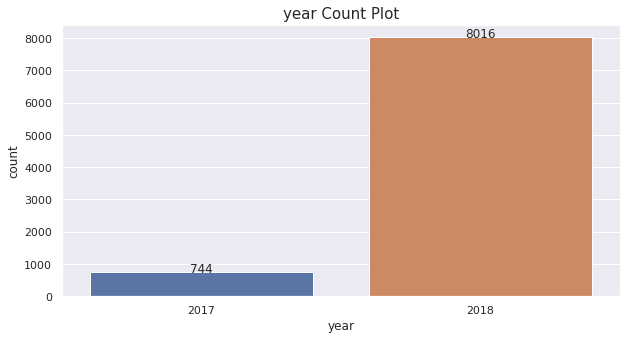

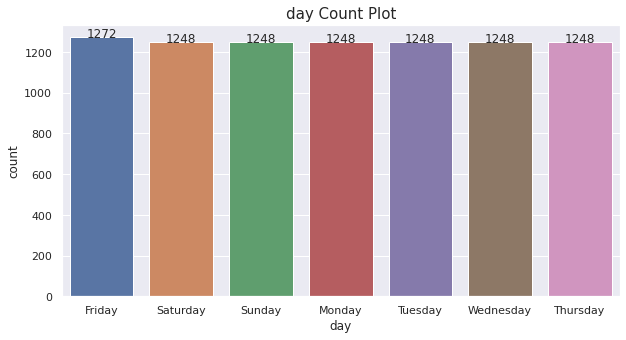

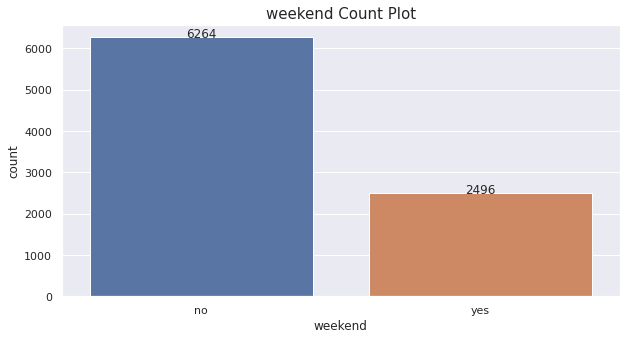

In [77]:
# Chart - 1 visualizating the count of bikes rented over different hours of the day
sns.set(rc={"figure.figsize":(10, 5)})
for i in BikeShare_data.select_dtypes('object'):
  uni=sns.countplot(BikeShare_data[i])
  for n in uni.patches:
    uni.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
  uni.set_title(i +' Count Plot',fontsize=15)
  plt.show()


##### 1. Why did you pick the specific chart?

The Seaborn count plot gives us the observations count spread over categorical variables with the help of bars. We can easily interpret observations within a particular category. 

##### 2. What is/are the insight(s) found from the chart?

* Each hour in a day holds an observation.
* 2017 has 748 observations
* 2018 has 8016 observations
* We already know that the dataset contains information from 01/12/2017 through 30/11/2018
* There are 2496 entries for weekends, and 6264 entries are for weekdays entries.
* There are 432 observations as holidays and 8326 entries as no holidays.
* There are 295 non-functioning days and 8465 functioning days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* We have observations for each hour of the day, which help us to predict the demand based on the hour.
* The observations for the non-functioning day seem to have entries in the dataset. If the day is a non-functioning day, then the number of rentals will be zero. Hence the observations with non-functioning data can be dropped.
* We have entries for weekends and weekdays. With the data, we can predict if there is any demand change between these two categories.
* Whether Holiday or No holiday affects the demand.

#### **Chart - 2  Distribution plot for Numerical Variables**

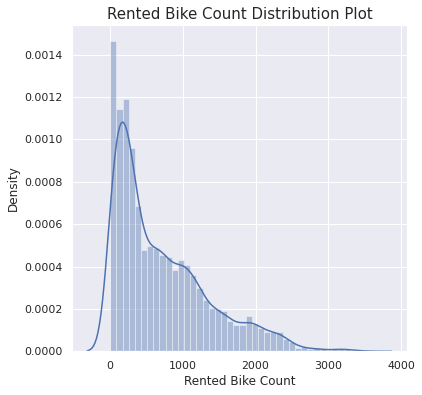

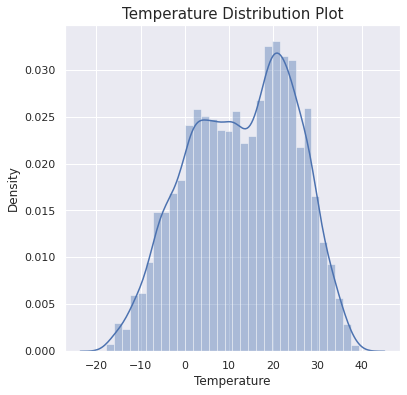

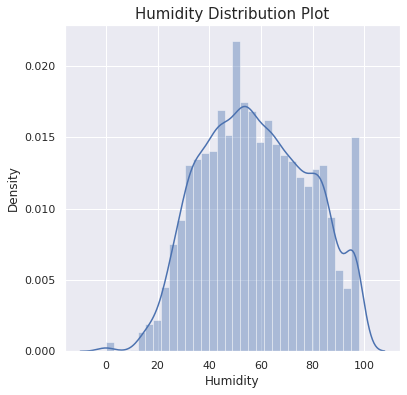

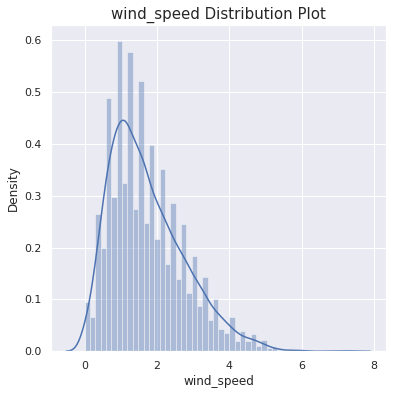

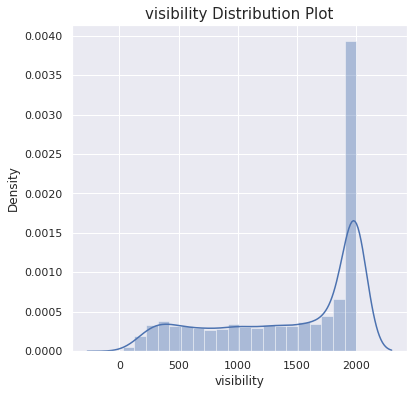

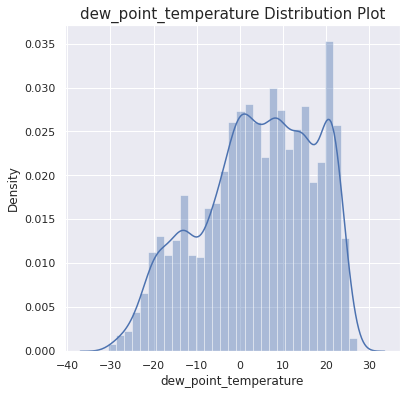

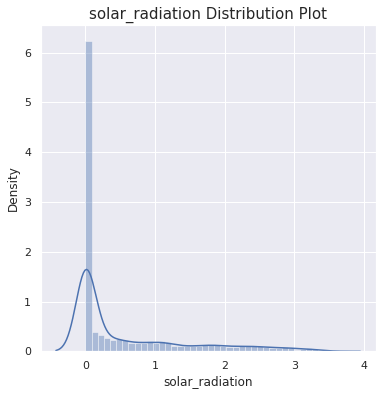

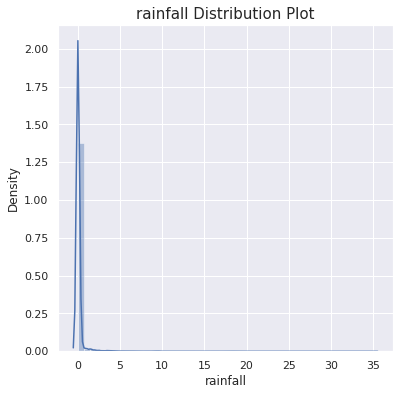

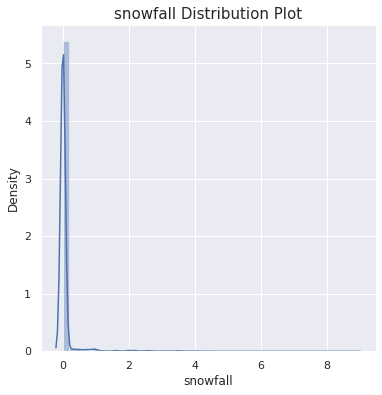

In [23]:
# Chart - 7 Distribution of different variables in the dataframe
sns.set(rc={"figure.figsize":(6, 6)})
for i in BikeShare_data.describe().columns:
  dist=sns.distplot(BikeShare_data[i])
  dist.set_title(i+' Distribution Plot',fontsize=15)
  plt.show()

##### 1. Why did you pick the specific chart?

Distplot depicts the variation in the distribution of the continuous data. A distribution plot helps to determine whether the variable has any skewness or kurtosis associated with it. 

##### 2. What is/are the insight(s) found from the chart?

* Rented Bike Count - Positively Skewed
* Temperature - Negatively Skewed
* Humidity - Platykurtic
* Wind_speed - Positively Skewed
* Visibility - Negatively Skewed
* Dew_point_temperature - Negatively Skewed and platykurtic
* Solar_radiation - Positively Skewed and leptokurtic
* Rainfall - Positively Skewed and leptokurtic
* Snowfall - Positively Skewed and leptokurtic

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In Linear Regression, we assume that the dependent variable follows a normal distribution. In this case, the Rented Bike Count is our dependent variable and has a positively skewed distribution. We have to do a transformation to make it a normally distributed variable.

#### **Chart - 3  Count of bikes rented over different hours of the day**

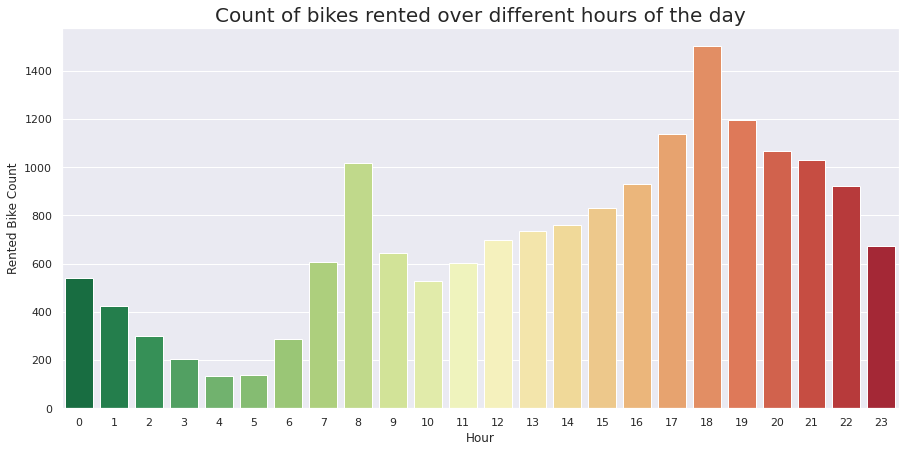

In [24]:
# Chart - 1 visualizating the count of bikes rented over different hours of the day
sns.set(rc={"figure.figsize":(15, 7)})
rented_vs_hour=sns.barplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',palette='RdYlGn_r',ci=None)
rented_vs_hour.set_title('Count of bikes rented over different hours of the day',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart -  Bike Rental over different hours in different seasons**

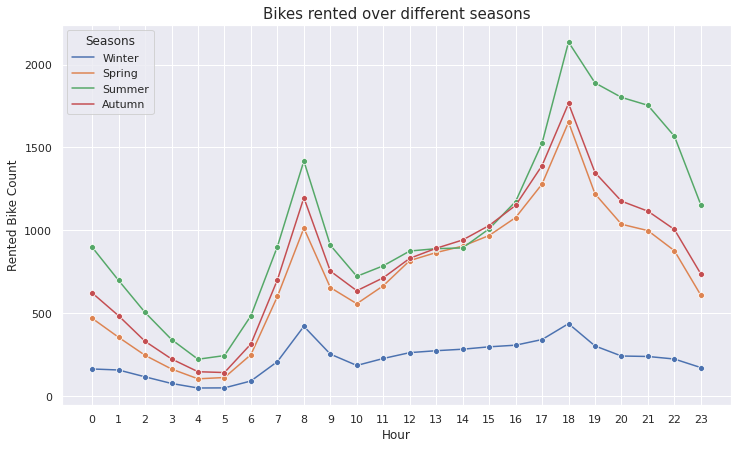

In [25]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(12, 7)})
rentedHour_vs_seasons=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='Seasons',ci=None,marker='o')
rentedHour_vs_seasons.set_title('Bikes rented over different seasons',fontsize=15)
rentedHour_vs_seasons.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 2 Bike Rental over different seasons**

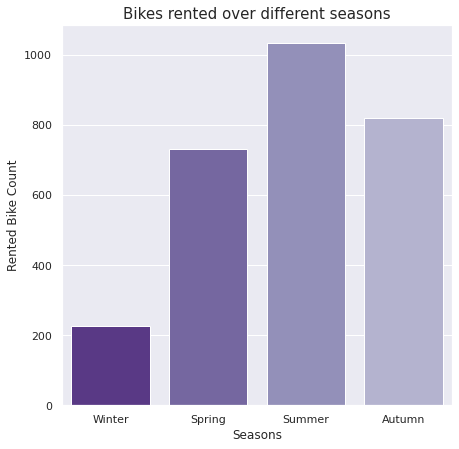

In [26]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(7, 7)})
sns.set_palette('Purples_r')
rented_vs_seasons=sns.barplot(data=BikeShare_data,x='Seasons',y='Rented Bike Count',ci=None)
rented_vs_seasons.set_title('Bikes rented over different seasons',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - Bike Rentals over different Months**

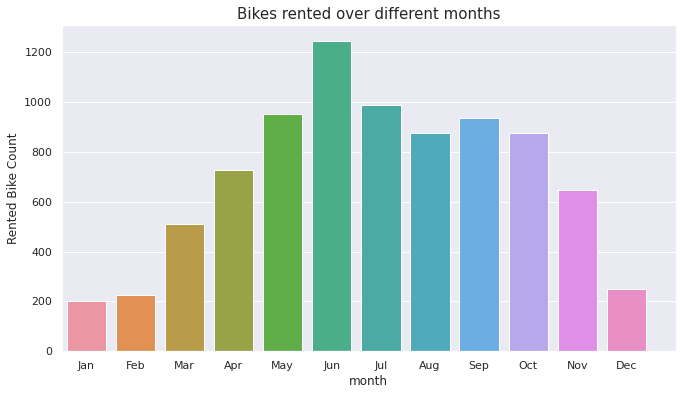

In [27]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(11, 6)})
rented_vs_months=sns.barplot(data=BikeShare_data,x='month',y='Rented Bike Count',ci=None)
rented_vs_months.set_title('Bikes rented over different months',fontsize=15)
rented_vs_months.set_xticks(range(13))
rented_vs_months.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 3 Bikes rented over weekend or weekday**

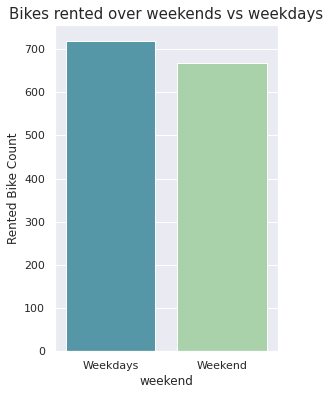

In [28]:
# Chart - 3 Bikes rented over weekend or weekday
sns.set(rc={"figure.figsize":(4, 6)})
sns.set_palette('Spectral_r')
BikeShare_data.weekend.replace({'yes':'Weekend','no':'Weekdays'})
rented_vs_days=sns.barplot(data=BikeShare_data.replace({'yes':'Weekend','no':'Weekdays'}),x='weekend',y='Rented Bike Count',ci=None)
rented_vs_days.set_title('Bikes rented over weekends vs weekdays',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 4 Bike rentals hours in weekends**

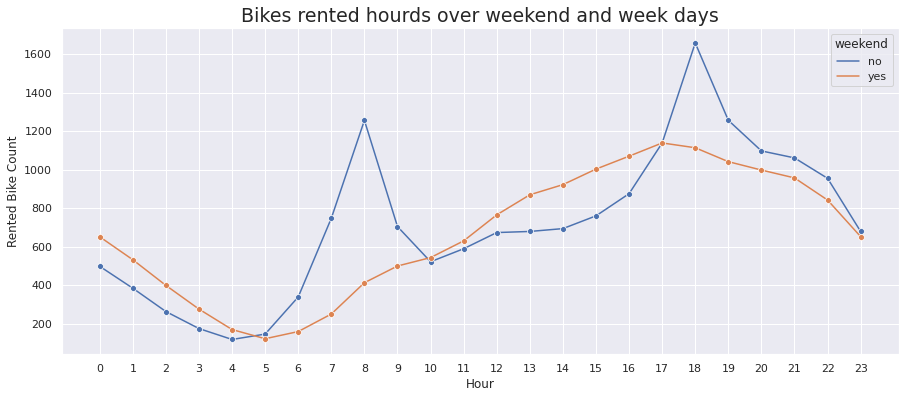

In [29]:
# Chart - 4 Bike rentals hours in weekends
sns.set(rc={"figure.figsize":(15, 6)})
rented_weekend=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='weekend',marker='o',ci=None)
rented_weekend.set_title('Bikes rented hourds over weekend and week days',fontsize=19)
rented_weekend.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 5 Bike rentals over holidays vs Non-Holidays**

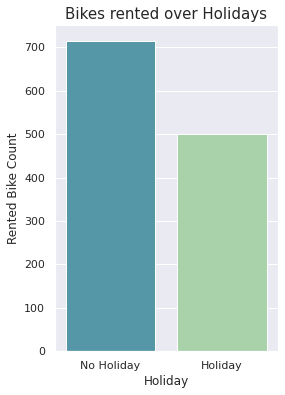

In [30]:
# Chart - 5 Bike rentals over holidays vs Non-Holidays
sns.set(rc={"figure.figsize":(4, 6)})
sns.set_palette('Spectral_r')
rented_vs_days=sns.barplot(data=BikeShare_data,x='Holiday',y='Rented Bike Count',ci=None)
rented_vs_days.set_title('Bikes rented over Holidays',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 6 Bikes rented over different hours during holidays**

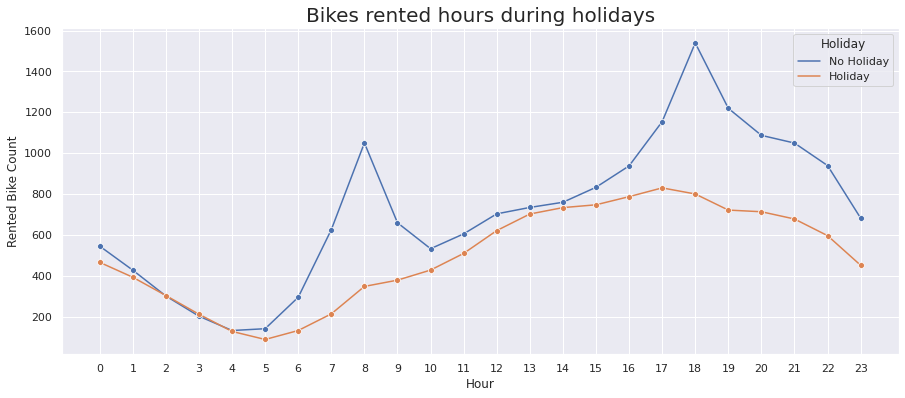

In [31]:
# Chart - 6 visualization of Bikes rented over different hours during holidays
sns.set(rc={"figure.figsize":(15, 6)})
rented_vs_months=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='Holiday',marker='o',ci=None)
rented_vs_months.set_title('Bikes rented hours during holidays',fontsize=20)
rented_vs_months.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 11 numerical variables vs the dependent varibale**

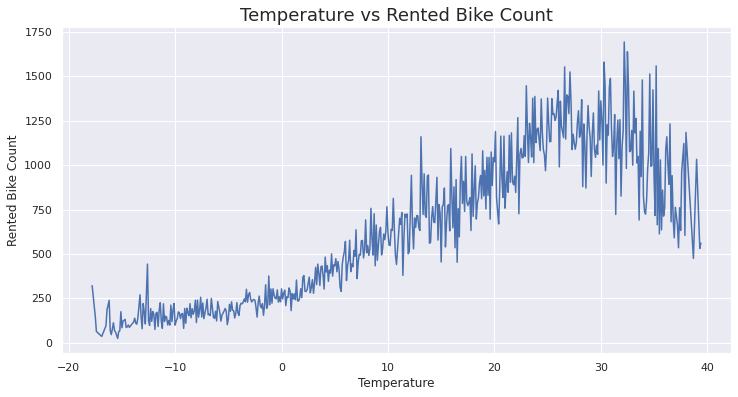

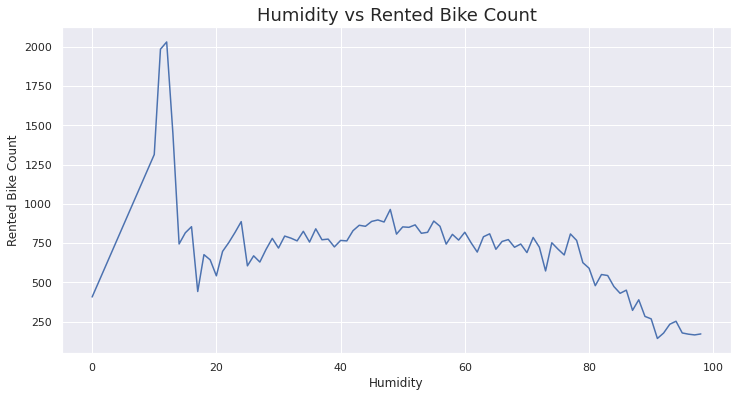

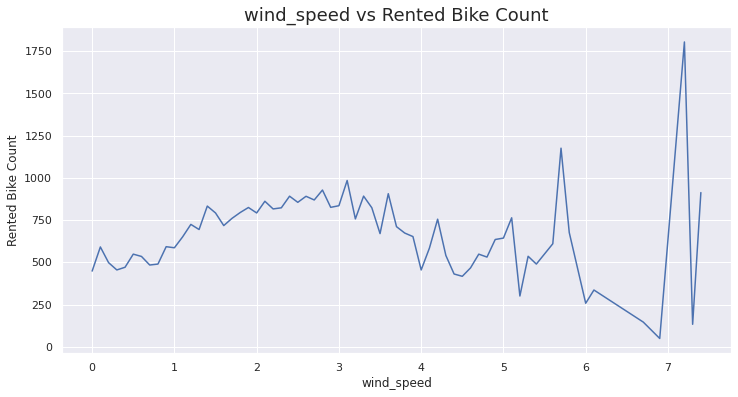

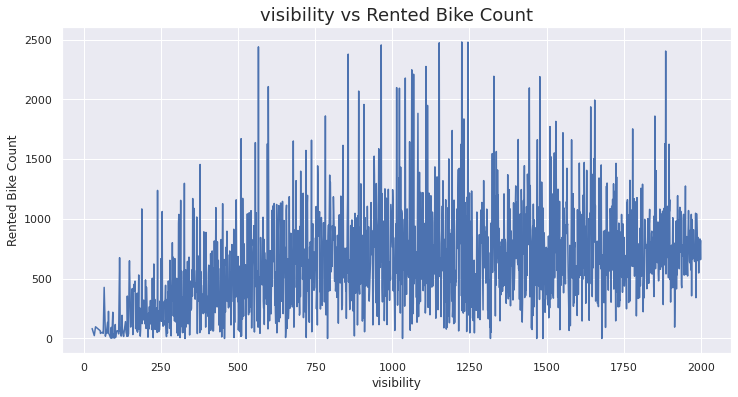

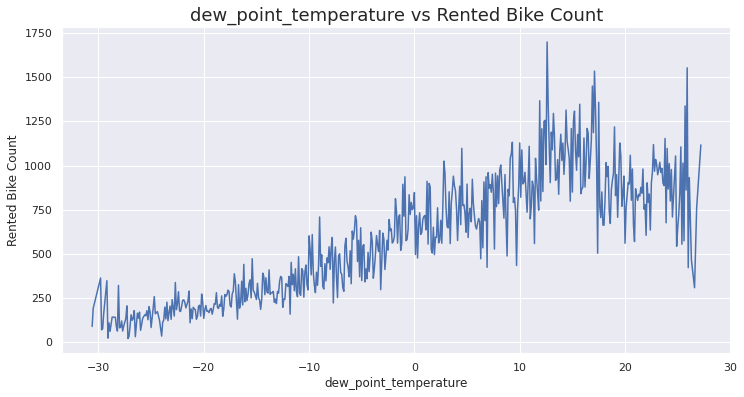

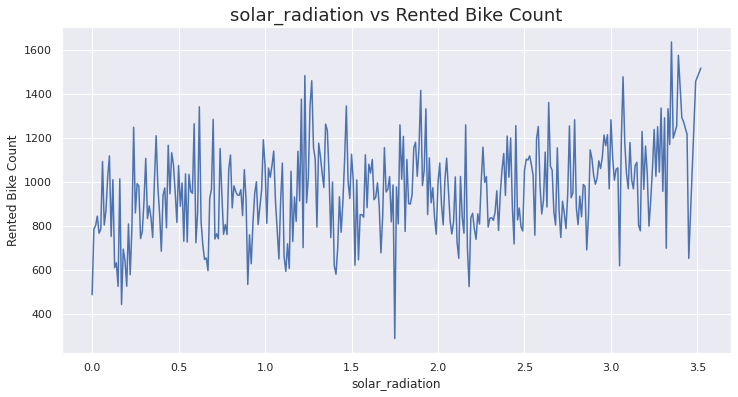

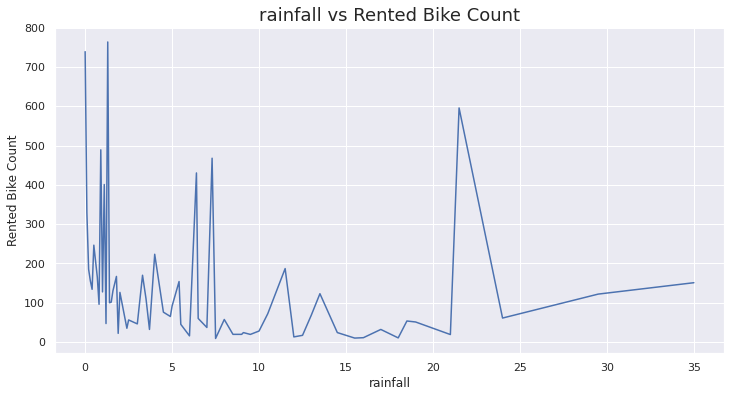

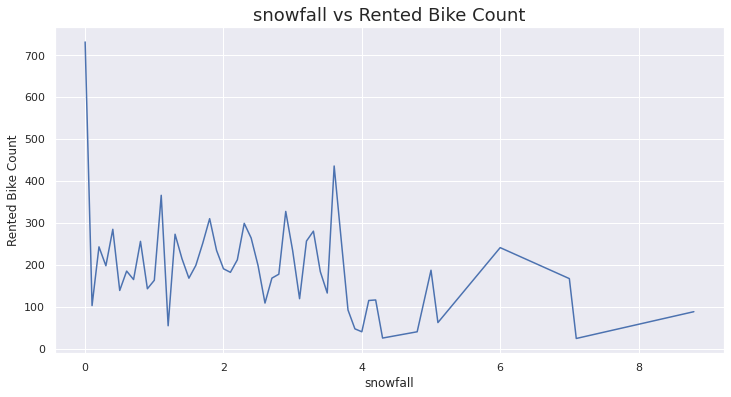

In [32]:
# Chart - 11 visualization the numerical variables vs the dependent varibale
line_data=list(BikeShare_data.describe().columns)
line_data.remove('Rented Bike Count')
sns.set(rc={"figure.figsize":(12,6)})
for i in line_data:
  sns.lineplot(data=BikeShare_data,x=i,y='Rented Bike Count',ci=None)
  plt.title( i + ' vs Rented Bike Count',fontsize=18)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 8 Regression plot for Numerical Variable**

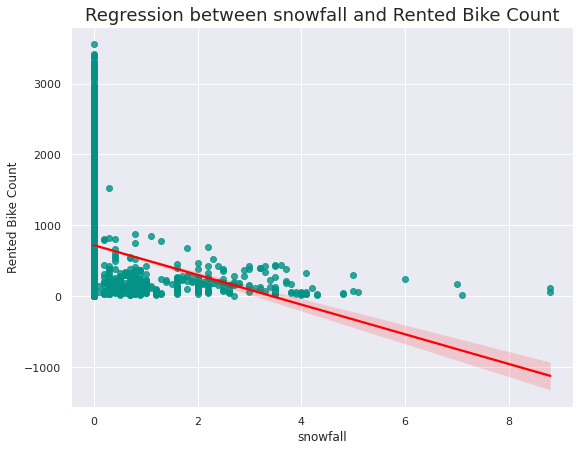

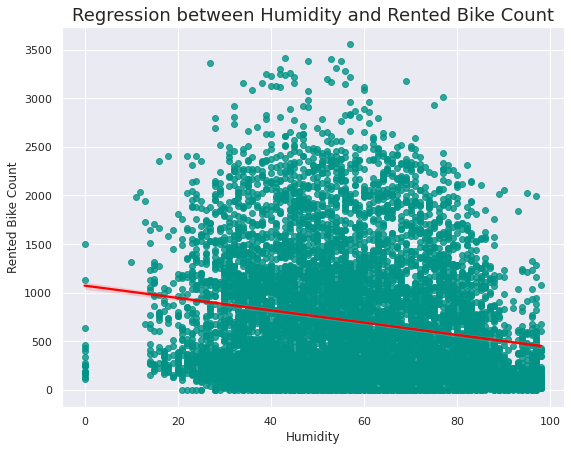

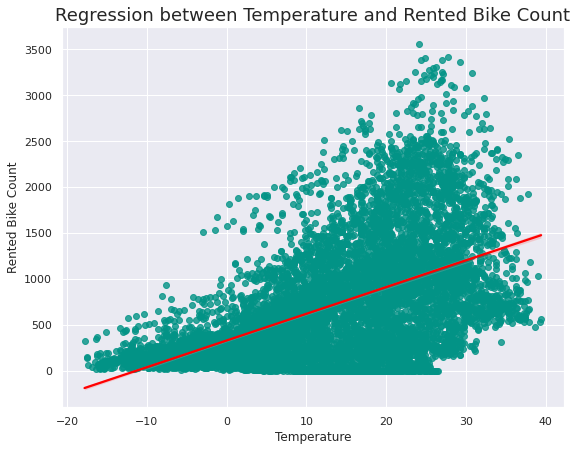

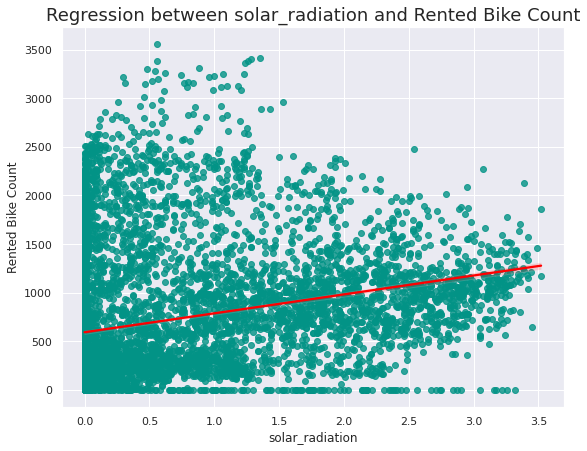

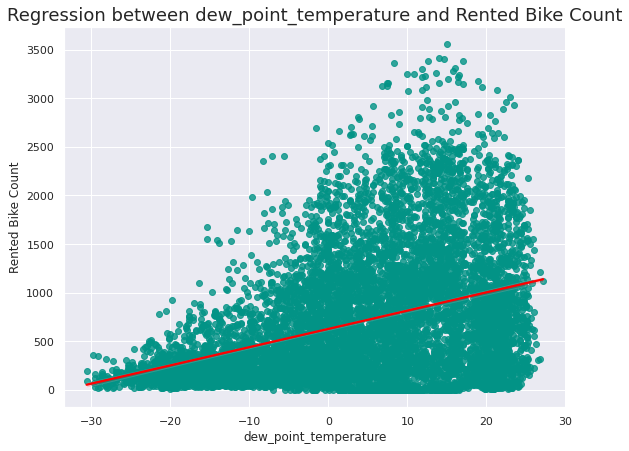

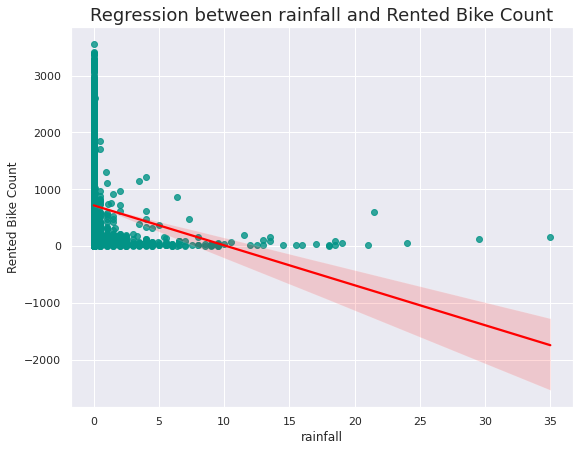

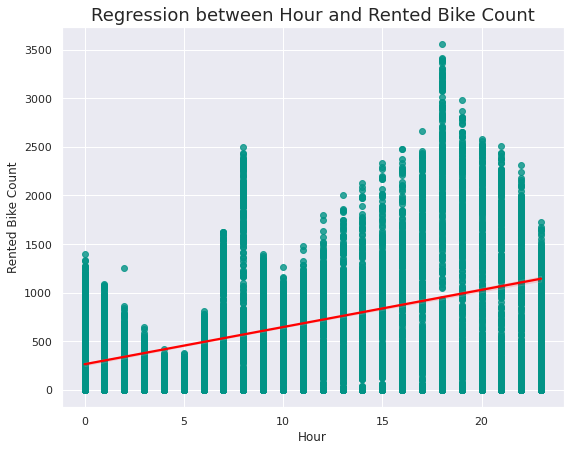

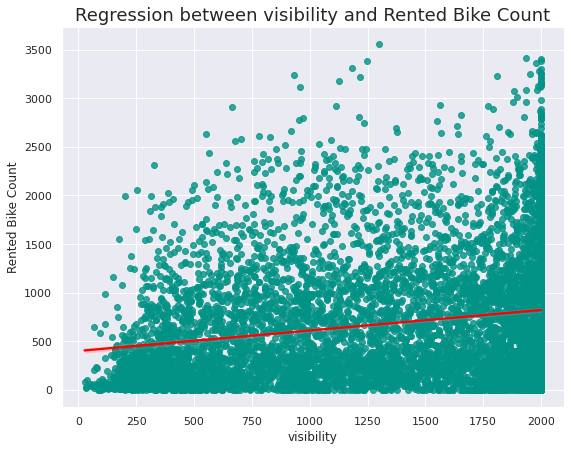

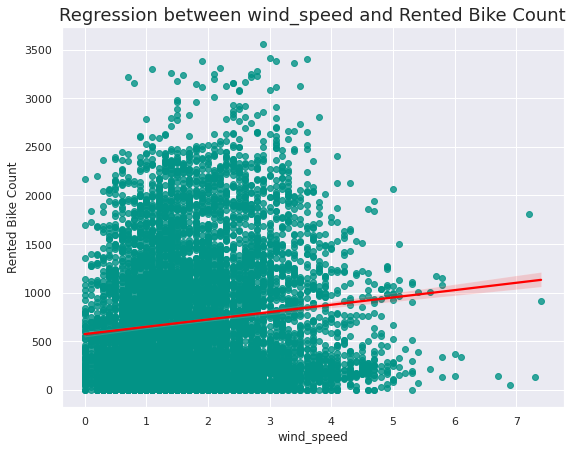

In [33]:
# Chart - 8 visualization code
sns.set(rc={"figure.figsize":(9,7)})
BikeShare_data['Hour']=BikeShare_data['Hour'].astype('int')
reg_variables=list((set(BikeShare_data.describe().columns)-{'Rented Bike Count'}))
for i in reg_variables:
  sns.regplot(x=BikeShare_data[i],y=BikeShare_data['Rented Bike Count'],scatter_kws={'color':'#029386'},line_kws={'color':'red'})
  plt.title('Regression between '+i+' and Rented Bike Count',fontsize=18)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 9 Correlation**

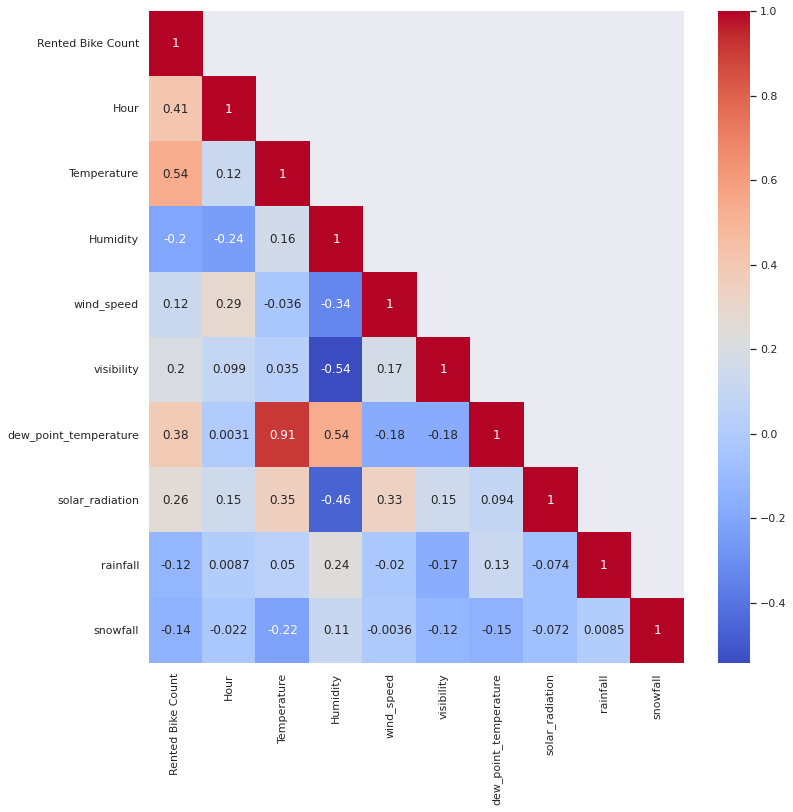

In [34]:
# Chart - 9 Correlation between variables
sns.set(rc={"figure.figsize":(12,12)})
corr=np.array(BikeShare_data.corr())
corr[np.tril_indices_from(corr)]=False
sns.heatmap(BikeShare_data.corr(),annot=True,mask=corr,cmap='coolwarm')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 12 **

In [35]:
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'Seasons', 'Holiday', 'functioning_day',
       'month', 'year', 'day', 'weekend'],
      dtype='object')

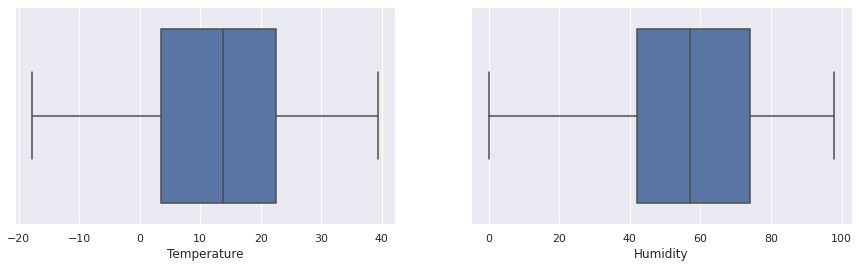

In [36]:
# Chart - 12 visualization code
sns.set(rc={"figure.figsize":(15,4)})
fig, ax =plt.subplots(1,2)
sns.boxplot(BikeShare_data['Temperature'],ax=ax[0])
sns.boxplot(BikeShare_data['Humidity'],ax=ax[1])
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 13 Functional Day vs Bike Rental count**

In [37]:
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'Seasons', 'Holiday', 'functioning_day',
       'month', 'year', 'day', 'weekend'],
      dtype='object')

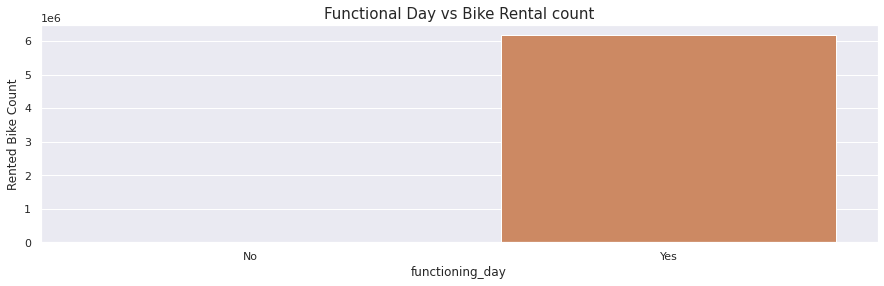

In [40]:
# Chart - 13 visualization code
FuncVsrental=BikeShare_data.groupby('functioning_day')['Rented Bike Count'].sum().reset_index()
sns.barplot(data=FuncVsrental,x='functioning_day',y='Rented Bike Count')
plt.title('Functional Day vs Bike Rental count',fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# grouping functional day
functional=BikeShare_data.groupby(['functioning_day']).agg({'Rented Bike Count':'sum'}).reset_index()
functional

In [ ]:
#creating a copy of data
bike_df=BikeShare_data.copy()
bike_df = bike_df.query('functioning_day == "Yes"')

In [ ]:
# Encode your categorical columns
bike_df.drop(columns=['Date','functioning_day'],inplace=True)
bike_df[['Seasons','Holiday','month','year','day','weekend']]=bike_df[['Seasons','Holiday','month','year','day','weekend']].apply(LabelEncoder().fit_transform)
bike_en=bike_df.apply(LabelEncoder().fit_transform)


In [ ]:
len(bike_df.columns)

In [ ]:
BikeShare_data.head()

In [ ]:
bike_en.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

In [ ]:
bike_en.drop(columns=['dew_point_temperature'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

In [ ]:
bike_en.drop(columns=['year'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

In [ ]:
bike_en.drop(columns=['Humidity'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

In [ ]:
bike_en.drop(columns=['Holiday'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
independent_variables=list(set(bike_df.columns)-{'Rented Bike Count'})
x=bike_df[independent_variables]
y=np.sqrt(bike_df['Rented Bike Count'])
scale=StandardScaler()
x=scale.fit_transform(x)

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [ ]:
#checking thw shapes of the test and train_data
print(f'Shape of x test :{x_train.shape}')
print(f'Shape of x test :{x_test.shape}')
print(f'Shape of x test :{y_train.shape}')
print(f'Shape of x test :{y_test.shape}')


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Linear Regression
# Fit the Algorithm
reg=LinearRegression().fit(x_train,y_train)
#intercept for regression
reg.intercept_

In [ ]:
#coeff of the regression
reg.coef_

In [ ]:
test_predict=reg.predict(x_test)
#score of train set
reg.score(x_train,y_train)

In [ ]:
#score of test set
reg.score(x_test,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#  creating a function to print the errors
def error(x,y,z):
  print(f'R2_ score {z} data = {round(r2_score(x,y),2)}')
  print(f'Mean Squared Error for the {z} data = {round(mean_squared_error(x,y),2)}')
  print(f'Root Mean Squared Error for the {z} data = {round(np.sqrt(mean_squared_error(x,y)),2)}')
  print(f'Mean Absolute Error for the {z} data = {round(mean_absolute_error(x,y),2)}')


In [ ]:
#Errors for train data in Linear Regression
error(y_train,reg.predict(x_train),'Train')

In [ ]:
#Errors for test data in linear Regression
error(y_test,reg.predict(x_test),'Test')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 2 Lasso Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso=Lasso(alpha=0.002,max_iter=2000).fit(x_train,y_train)
#lasso intersept
lasso.coef_

In [ ]:
lasso.intercept_

In [ ]:
lasso.predict(x_test)

In [ ]:
lasso.score(x_test,y_test)

In [ ]:
#Errors for train data in lasso Regression
error(y_train,lasso.predict(x_train),'Train')

In [ ]:
#Errors for train data in lasso Regression
error(y_test,lasso.predict(x_test),'Test')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
r=ElasticNetCV(cv=5).fit(x_train,y_train)

In [ ]:
r.score(x_train,y_train)

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lassocv=LassoCV(alphas=[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],cv=5)
# Fit the Algorithm
lassocv.fit(x_train,y_train)
# Predict on the model
pred=lassocv.predict(x_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***